In [2]:
import pytorch_lightning as pl
import pl_bolts

print(f"pl version: {pl.__version__}")
print(f"pl_bolts version: {pl_bolts.__version__}")

pl version: 1.4.1
pl_bolts version: 0.3.4


In [3]:
import torch 
from torchvision import models

resnet50 = models.resnet50(pretrained= True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/anhtruong1209/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:09<00:00, 11.4MB/s]


In [4]:
resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
from torchvision.datasets import CIFAR10
from torchvision import transforms

normalize = transforms.Normalize(mean=[x / 255.0 for x in [125.3, 123.0, 113.9]],
                                 std=[x / 255.0 for x in [63.0, 62.1, 66.7]])

cf10_transforms = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

cifar_10 = CIFAR10('.', train=True, download=True, transform=cf10_transforms)

170499072it [00:17, 10029109.77it/s]                               


Extracting ./cifar-10-python.tar.gz to .


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


LABEL: 6


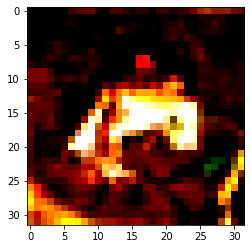

In [10]:
from matplotlib import pyplot as plt

image, label = next(iter(cifar_10))
print(f"LABEL: {label}")
plt_img = image.numpy().transpose(1, 2, 0)
plt.imshow(plt_img);

In [11]:
from torch.utils.data import DataLoader

train_loader = DataLoader(cifar_10, batch_size=32, shuffle=True)

In [12]:
for batch in train_loader:
    x, y = batch
    print(x.shape, y.shape)
    break

torch.Size([32, 3, 32, 32]) torch.Size([32])


In [13]:
import torch
from torchvision import models

resnet50 = models.resnet50(pretrained=True)

for param in resnet50.parameters():
    param.requires_grad = False

num_classes = 10
resnet50.fc = torch.nn.Linear(resnet50.fc.in_features, num_classes)

# Use afterwards in optimizer: resnet50.fc.parameters()

In [14]:
x, y = next(iter(train_loader))

preds = resnet50(x)
preds[:5]

tensor([[ 0.3185, -0.1643,  0.2102, -0.1857,  0.0751,  0.5054, -0.4001, -0.3949,
          0.3784, -0.6574],
        [ 0.4388,  0.3095,  0.5223, -1.8100, -0.7303,  0.7158,  0.4228, -0.5319,
          1.2022, -0.1501],
        [-0.2333,  0.1175,  0.4912, -0.4730, -0.4146,  0.9314, -0.7580,  0.2394,
          0.2795,  0.3217],
        [ 0.1361, -0.6530,  0.3741,  0.0884, -0.1046,  0.4530, -0.4451,  0.2496,
         -0.1394, -0.4857],
        [-0.2056, -1.0371,  0.2796, -0.7438,  0.2477,  0.7109, -0.2530, -0.4234,
          1.2344, -0.2233]], grad_fn=<SliceBackward>)

In [15]:
from torch.nn.functional import softmax

preds = softmax(preds, dim=-1)
preds[:5]

tensor([[0.1329, 0.0820, 0.1193, 0.0803, 0.1042, 0.1602, 0.0648, 0.0651, 0.1411,
         0.0501],
        [0.1141, 0.1003, 0.1240, 0.0120, 0.0354, 0.1505, 0.1123, 0.0432, 0.2448,
         0.0633],
        [0.0670, 0.0952, 0.1383, 0.0527, 0.0559, 0.2148, 0.0397, 0.1075, 0.1119,
         0.1168],
        [0.1135, 0.0516, 0.1440, 0.1082, 0.0892, 0.1558, 0.0635, 0.1271, 0.0862,
         0.0609],
        [0.0681, 0.0297, 0.1107, 0.0398, 0.1072, 0.1704, 0.0650, 0.0548, 0.2875,
         0.0669]], grad_fn=<SliceBackward>)

In [16]:
pred_labels = torch.argmax(preds, dim=-1)
pred_labels[:5]

tensor([5, 8, 5, 5, 8])

In [17]:
#  Bolts: Data Module: 3 data loaders

from pl_bolts.datamodules import CIFAR10DataModule

dm = CIFAR10DataModule('.')

In [18]:
# # PyTorch

# from torch.nn.functional import cross_entropy
# from torch.optim import Adam

# optimizer = Adam(resnet50.fc.parameters(), lr=1e-3)

# epochs = 10
# for epoch in range(epochs):
#     for batch in dm.train_dataloader():
#         x, y = batch

#         # features = backbone(x)
#         # # disable gradients to backbone if all parameters used by the optimizer
#         # features = features.detach()

#         # # tell PyTorch not to track the computational graph: much faster, less memory used: not backpropagated
#         # with torch.no_grad():
#         #     features = backbone(x)

#         # preds = finetune_layer(features)

#         preds = resnet50(x)

#         loss = cross_entropy(preds, y)

#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()

In [19]:
# PyTorch Lightning
import pytorch_lightning as pl
from pytorch_lightning.metrics.functional import accuracy

from torch.nn.functional import cross_entropy
from torch.optim import Adam

class ImageClassifier(pl.LightningModule):
    def __init__(self, num_classes=10, lr=1e-3):
        super().__init__()
        self.save_hyperparameters()
        # self.num_classes = num_classes
        # self.lr = lr

        self.model = models.resnet50(pretrained=True)

        for param in self.model.parameters():
            param.requires_grad = False

        self.model.fc = torch.nn.Linear(self.model.fc.in_features, num_classes)

    def training_step(self, batch, batch_idx):
        # return the loss given a batch: this has a computational graph attached to it: optimization
        x, y = batch
        preds = self.model(x)
        loss = cross_entropy(preds, y)
        self.log('train_loss', loss, prog_bar=True)  # lightning detaches your loss graph and uses its value
        self.log('train_acc', accuracy(preds, y), prog_bar= True) #
        return loss

    def configure_optimizers(self):
        # return optimizer
        optimizer = Adam(self.model.fc.parameters(), lr=self.hparams.lr)
        return optimizer

In [20]:
classifier = ImageClassifier()

trainer = pl.Trainer(progress_bar_refresh_rate=20, gpus=1, max_epochs=10)  # for Colab: set refresh rate to 20 instead of 10 to avoid freezing
trainer.fit(classifier, dm)  # train_loader

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/anhtruong1209/miniconda3/envs/torch/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:99: UserWarning: you passed in a val_dataloader but have no validation_step. Skipping val loop
  rank_zero_warn(f"you passed in a {loader_name} but have no {step_name}. Skipping {stage} loop")


Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
20.5 K    Trainable params
23.5 M    Non-trainable params
23.5 M    Total params
94.114    Total estimated model params size (MB)
/home/anhtruong1209/miniconda3/envs/torch/lib/python3.9/site-packages/torch/utils/data/dataloader.py:474: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 0:   0%|          | 0/1250 [00:00<00:01, 1041.80it/s]  

/home/anhtruong1209/miniconda3/envs/torch/lib/python3.9/site-packages/deprecate/deprecation.py:115: LightningDeprecationWarning: The `accuracy` was deprecated since v1.3.0 in favor of `torchmetrics.functional.classification.accuracy.accuracy`. It will be removed in v1.5.0.
  stream(template_mgs % msg_args)


Epoch 3:  51%|█████     | 640/1250 [00:16<00:15, 38.91it/s, loss=1.39, v_num=0]

In [ ]:
# Start tensorboard
%reload_ext tensorboard
%tensorboard --logdir lightning_logs/